### Import Libraries


In [1]:
import re
import cv2
import numpy as np
import pytesseract
from pytesseract import Output
import matplotlib.pyplot as plt

### Define Functions

In [2]:
def get_text_orientation_and_script(image):
    
    text = pytesseract.image_to_string(image)
    osd = pytesseract.image_to_osd(image)
    rotation_angle = float(osd.split('\n')[2].split(':')[1])
    
    return text, rotation_angle

In [3]:
def detect_script_type(image):
    
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    edges = cv2.Canny(gray, 50, 150)
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    detected_script_types = []
    for contour in contours:
        x, y, w, h = cv2.boundingRect(contour)
        aspect_ratio = w / h if h != 0 else 0 
        if aspect_ratio > 0.5:
            detected_script_types.append("Latin")
        else:
            detected_script_types.append("Non-Latin")

    if detected_script_types.count("Latin") > len(detected_script_types) / 2:
        return "Latin"
    else:
        return "Non-Latin"

In [4]:
def rotate_image(image, angle):
    height, width = image.shape[:2]
    center = (width // 2, height // 2)
    
    matrix = cv2.getRotationMatrix2D(center, -angle, 1.0)
    
    rotated_height = int(abs(matrix[0, 0] * height) + abs(matrix[0, 1] * width))
    rotated_width = int(abs(matrix[0, 1] * height) + abs(matrix[0, 0] * width))

    matrix[0, 2] += (rotated_width - width) / 2
    matrix[1, 2] += (rotated_height - height) / 2

    rotated_image = cv2.warpAffine(image, matrix, (rotated_width, rotated_height))
    return rotated_image

### Load Image

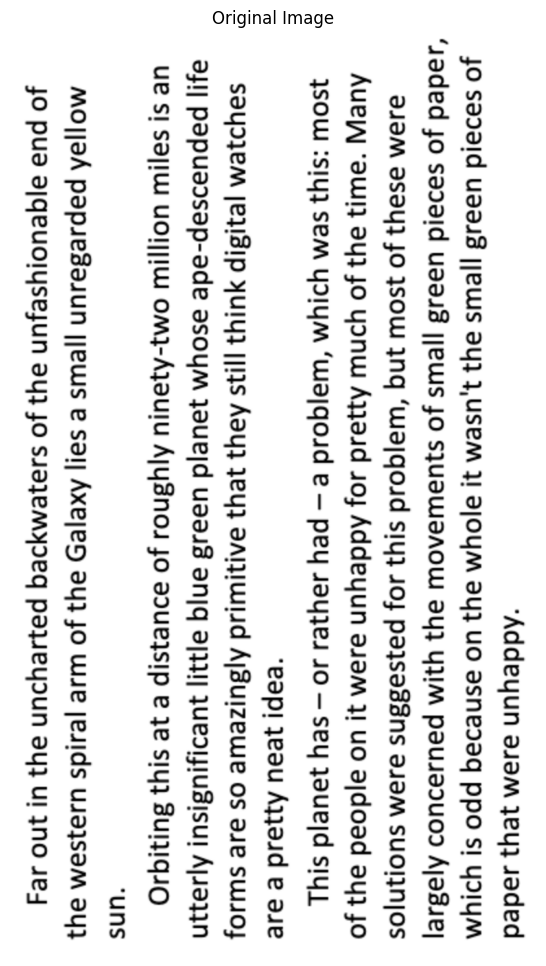

In [5]:
image = cv2.imread('./Dataset/hitchhikers-rotated.png')

plt.figure(figsize=(16, 12))
plt.imshow(image)
plt.title('Original Image')
plt.axis('off')
plt.show()

### Original Image OCR

In [9]:
text, rotation_angle = get_text_orientation_and_script(image) 
script_type = detect_script_type(image)

print(f"Original Image Angle: {rotation_angle} degrees")
print(f"Original Script Type: {script_type}")
print(f"Text before Rotation: \n{text}")

Original Image Angle: 90.0 degrees
Original Script Type: Latin
Text before Rotation: 
‘Addeyun asam jeu} Jaded

jo sadaid uae8 |jeWS Jy} },USeM }! BJOYM Uy} UO asnedaq ppo Ss! YDIUM

‘1aded jo sadaid uaai3 |jelWs JO SJUBLUAAOW 94} YIM pausaoUOD Ajazie|

3JIM BSU} JO JSOW Ng ‘Wajqod siy} JO} pajsadsns a1aM suO!yNjOs

Aue ‘awi} ay} Jo YOnwW Ayasd 10} Addeyun asam 3 UO ajdoad ay} Jo
JSOW :SIy} SEM YDIYM ‘Wajqoid e — pey Jayjes JO — sey Jaueld siyy

“eap! yeau Ajjaud e aue

SAYIIEM [eUSIP YUIY} []19S Ady. JEU} SAIZILULId AjsulZeWe Os ase SWIOJ

a}1| Papusdsap-ade ssoUM JoueR|d UBeI3 an|g aj}qI] JUeDIJIUSISU! AjJa}4N
ue SI Saji UOI||IWW OMj-AjauIU A]YBNOJ JO adUejSIP e Je SIY} BUIZIGIO

‘uns

MO}||aA papsesaiun |jews e salj Axejed ay} JO Wie jesIds Ua}saM au}
JO pua ajqeuolysejun ay} JO SsajzeMyIeG PayeyouN au} ul yNo Je



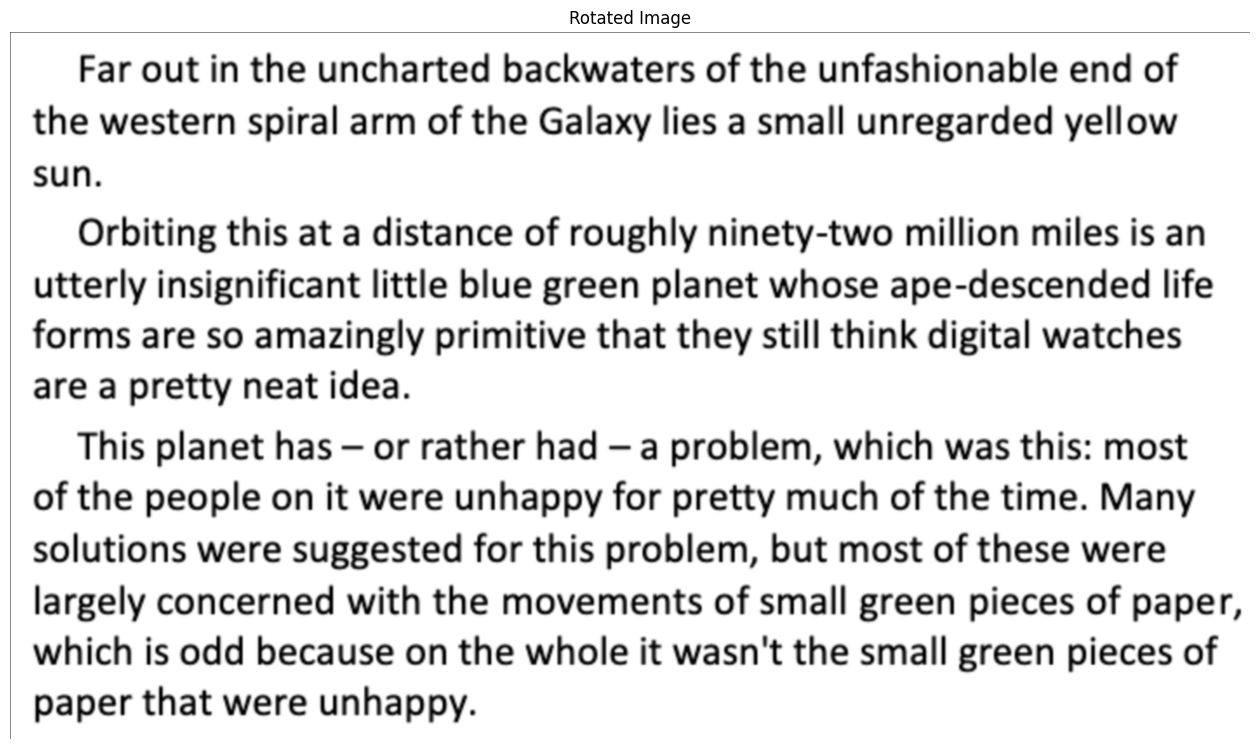

Rotated Image Angle: 0.0 derajat
Rotated Script Type: Latin
Text after Rotation: 
 

 

Far out in the uncharted backwaters of the unfashionable end of
the western spiral arm of the Galaxy lies a small unregarded yellow
sun.

Orbiting this at a distance of roughly ninety-two million miles is an
utterly insignificant little blue green planet whose ape-descended life
forms are so amazingly primitive that they still think digital watches
are a pretty neat idea.

This planet has — or rather had —a problem, which was this: most
of the people on it were unhappy for pretty much of the time. Many
solutions were suggested for this problem, but most of these were
largely concerned with the movements of small green pieces of paper,
which is odd because on the whole it wasn't the small green pieces of
paper that were unhappy.



In [8]:
rotated_image = rotate_image(image, rotation_angle)
text_rotation, rotaion_angle_after_rotation = get_text_orientation_and_script(rotated_image)
rotated_script_type = detect_script_type(rotated_image)

plt.figure(figsize=(16, 12))
plt.imshow(rotated_image)
plt.title('Rotated Image')
plt.axis('off')
plt.show()
    
print(f"Rotated Image Angle: {rotaion_angle_after_rotation} derajat")
print(f"Rotated Script Type: {rotated_script_type}")
print(f"Text after Rotation: \n{text_rotation}")